# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Problem Statement
E-news Express's design team has created a new landing page to see if they can acquire new subscribers. They are doing an A/B test to compare the previous landing page with the new landing page to determine the effectiveness of the new landing page. 100 users have been randomly selected and divided equally into two groups. The old landing page is served to the first group (the control group), and the new landing page is served to the second group (the treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. 

## Objectives

Through statistical analyses, the following questions will be answered/explored:
1.	Explore the dataset and extract insights using Exploratory Data Analysis.
2.	Do the users spend more time on the new landing page than the old landing page?
3.	Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
4.	Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
5.	Is the mean time spent on the new page same for the different language users?

*A significance level $\alpha$ of 0.05 is used for all tests.

## Data Dictionary
Data Dictionary:
1.	user_id - This represents the user ID of the person visiting the website.
2.	group - This represents whether the user belongs to the first group (control) or the second group (treatment).
3.	landing_page - This represents whether the landing page is new or old.
4.	time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
5.	converted - This represents whether the user gets converted to a subscriber of the news portal or not.
6.  language_preferred - This represents the language chosen by the user to view the landing page.


## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway 

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [2]:
# write the code for reading the dataset abtest.csv
#Reading in the data
df = pd.read_csv('abtest.csv')
print(df)

    user_id      group landing_page  time_spent_on_the_page converted  \
0    546592    control          old                    3.48        no   
1    546468  treatment          new                    7.13       yes   
2    546462  treatment          new                    4.40        no   
3    546567    control          old                    3.02        no   
4    546459  treatment          new                    4.75       yes   
..      ...        ...          ...                     ...       ...   
95   546446  treatment          new                    5.15        no   
96   546544    control          old                    6.52       yes   
97   546472  treatment          new                    7.07       yes   
98   546481  treatment          new                    6.20       yes   
99   546483  treatment          new                    5.86       yes   

   language_preferred  
0             Spanish  
1             English  
2             Spanish  
3              French  
4  

### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [3]:
#Data Overview
#Viewing first 5 rows
print(df.head())

#Shape of dataframe
print('\n')
print(f"The shape of the dataframe is {df.shape}. \nThere are {df.shape[0]} rows and {df.shape[1]} columns")

#Datatypes in dataframe
print('\n')
print(df.dtypes)

   user_id      group landing_page  time_spent_on_the_page converted  \
0   546592    control          old                    3.48        no   
1   546468  treatment          new                    7.13       yes   
2   546462  treatment          new                    4.40        no   
3   546567    control          old                    3.02        no   
4   546459  treatment          new                    4.75       yes   

  language_preferred  
0            Spanish  
1            English  
2            Spanish  
3             French  
4            Spanish  


The shape of the dataframe is (100, 6). 
There are 100 rows and 6 columns


user_id                     int64
group                      object
landing_page               object
time_spent_on_the_page    float64
converted                  object
language_preferred         object
dtype: object


In [4]:
#Converting group, landing_page, converted, and language_preferred to categorical type from object type
cols = ["group", "landing_page", "converted", "language_preferred"]
df[cols] = df[cols].astype('category')

#Verifying conversions applied to columns
print(df.dtypes)

user_id                      int64
group                     category
landing_page              category
time_spent_on_the_page     float64
converted                 category
language_preferred        category
dtype: object


In [5]:
# Determining if there are any missing values in the dataframe
# Total missing values for each column
print(df.isnull().sum())

# Any missing values?
print('\n')
print("True or False, are there any missing values?", df.isnull().values.any())

# Total number of missing values (if any)
print('\n')
print("Total number of missing values (if any) is", df.isnull().sum().sum())

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64


True or False, are there any missing values? False


Total number of missing values (if any) is 0


In [6]:
# Getting summary statistics for quantitative values - user_id and time_spent_on_the_page. Rounding values to 2 to avoid pandas from displaying scientific notation.
df[["user_id", "time_spent_on_the_page"]].describe().round(2)

,user_id,time_spent_on_the_page
count,100.00,100.00
mean,546517.00,5.38
std,52.30,2.38
min,546443.00,0.19
25%,546467.75,3.88
50%,546492.50,5.42
75%,546567.25,7.02
max,546592.00,10.71


In [7]:
# Getting summary statistics for categorical values - group, landing_page, converted, language_preferred
df[["group", "landing_page", "converted", "language_preferred"]].describe()

,group,landing_page,converted,language_preferred
count,100,100,100,100
unique,2,2,2,3
top,control,new,yes,French
freq,50,50,54,34


### Observations
* There are 100 rows and 6 columns in the dataset.
* The six columns originally have the following datatypes: 
    * user_id, int64
    * group, object
    * landing_page, object
    * time_spent_on_the_page, float64
    * converted, object
    * language_preferred, object
* Converted group, landing_page, converted, and language_preferred columns to dtype category to reduce memory usage.
* No missing values anywhere in the dataframe
* Takeaways from summary statistics of numeric columns (user_id, time_spent)
    * user_id has 100 unique values, which means no duplicates (no one user belong to both groups and is seeing both types of landing page), and is a way of identifying characteristics of a user.
    * time_spent_on_the_page ranges from 0.19 minutes to 10.71 minutes with the mean being 5.38 minutes. These values are for both types of landing page and for all languages.
* Takeaways from summary statistics of categorical columns (group, landing_page, converted, language_preferred)
    * group has 2 unique values (control and treatment) with each group having 50 participants.
    * landing_page has 2 unique values (new and old) with each page viewed 50 times.
    * converted has 2 unique values (no and yes) with there being more converts (Yes - 54). The number of converts is for both types of landing page.
    * language_preferred has 3 unique values with French the most common (French - 34).

### Univariate Analysis

In [8]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [9]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

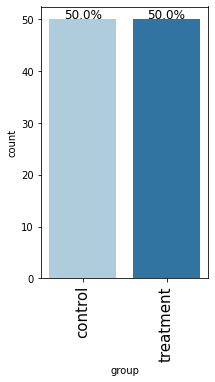

In [10]:
#group 
labeled_barplot(df, "group", perc = True)

# Observation
*  The bar plot confirms that both the control and treatment groups have the same split with each group having 50 people.

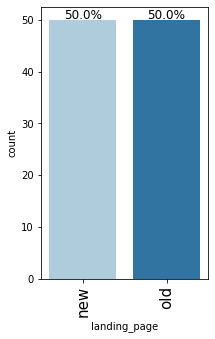

In [11]:
#landing_page
labeled_barplot(df, "landing_page", perc = True)

# Observation
*  The bar plot confirms that both the old and new landing pages were shown 50 times each with the old landing page shown to the control group and the new landing page showed to the treatment group.

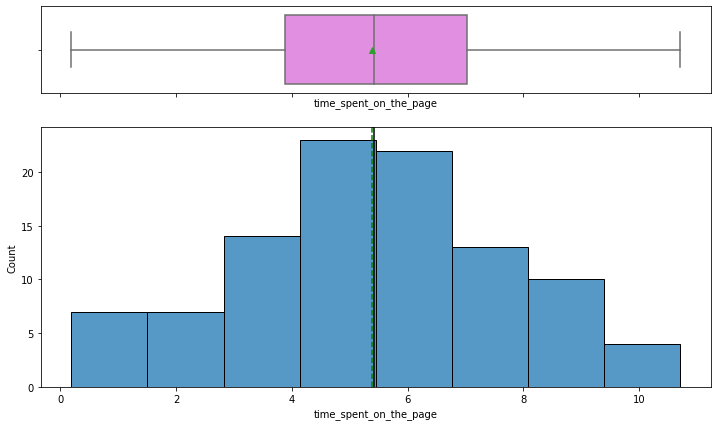

In [12]:
#time_spent_on_the_page
histogram_boxplot(df, "time_spent_on_the_page")

# Observations
*  The mean and median of time spent on the landing pages (both old and new) are shown to be very similar on the boxplot and histogram.
*  Due to the very small distance between mean and median, the distribution is pretty symmetrical.
*  There is a small group of users that spend up to 3 minutes on the landing page, and a smaller group of users that spend 9+ minutes. The rest fall in the middle.

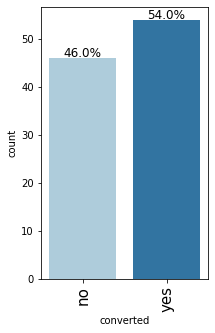

In [13]:
#converted
labeled_barplot(df, "converted", perc = True)

# Observation
*  For all landing pages (old and new), the total conversion out of the 100 randomly selected users is 54%, which is 54 users.

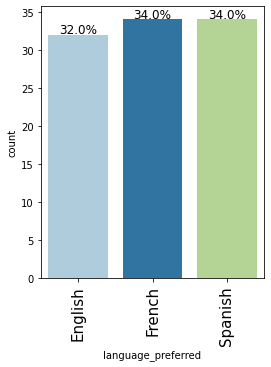

In [14]:
#language_preferred
labeled_barplot(df, "language_preferred", perc = True)

# Observation
*  There are two top langauges, French and Spanish, each measuring at 34% (which is also 34 users each) and English measuring at 32% (32 users), which comes out to 100 users total.

### Bivariate Analysis

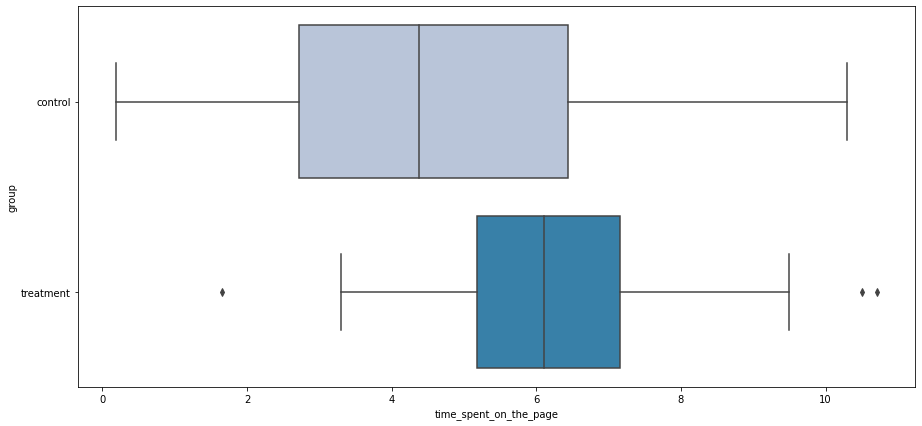

In [15]:
#Relationship between time_spent_on_the_page and group
plt.figure(figsize=(15,7))
sns.boxplot(x = "time_spent_on_the_page", y = "group", data = df, palette = 'PuBu')
plt.xticks(rotation = 0)
plt.show()

# Observations
*  For the control boxplot, there is a wider Interquartile Range than in the treatment boxplot.
*  The treatment group's Interquartile Range range is smaller, however, its 25th percentile value is greater than the control's median time. The 75th percentile value of the treatment group is ~1.5 minutes more than the 75th percentile value of the control group.
*  The median time spent on the landing page for the control group is ~2 minutes less than the median time spent on the landing page for the treatment group.
*  There are outliers for time spent on both sides for the treatment group. 
*  There are no outliers for time spent on either side for the control group.
*  The control boxplot has a right skew, and the treatment boxplot has a slight right skew.

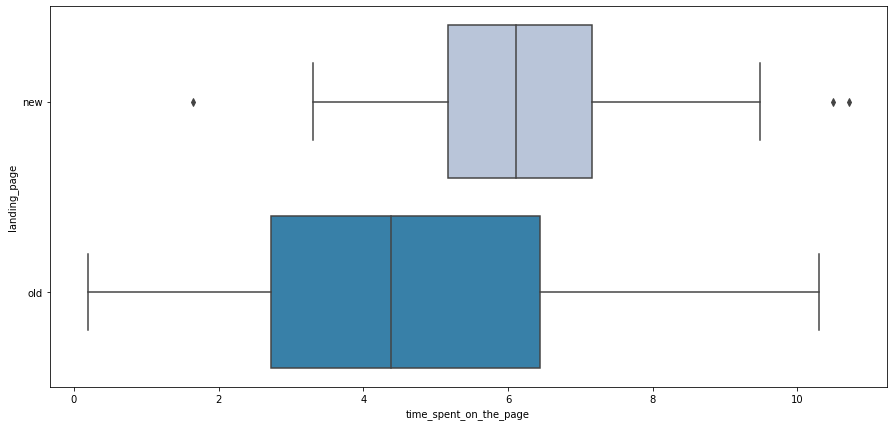

In [16]:
#Relationship between time_spent_on_the_page and landing_page
plt.figure(figsize=(15,7))
sns.boxplot(x = "time_spent_on_the_page", y = "landing_page", data = df, palette = 'PuBu')
plt.xticks(rotation = 0)
plt.show()

# Observations
*  The new landing page was shown to the treatment group, and the old landing page was shown to the control group. The boxplots group vs time_spent_on_the_page and landing_page vs time_spent_on_the_page are the same boxplot. This confirms the groups were given the appropriate landing pages since the boxplots are the same.
*  For the old landing page boxplot, there is a wider Interquartile Range than in the new landing page boxplot.
*  The new landing page's Interquartile Range is smaller, however, its 25th percentile value is greater than the old landing page's median time. 
*  The 75th percentile value of the new landing page is ~1.5 minutes more than the 75th percentile value of the old landing page.
*  The median time spent on the old landing page is ~2 minutes less than the median time spent on the new landing page.
*  There are outliers for time spent on both sides for the new landing page.
*  There are no outliers for time spent on either side for the old landing page.
*  The new landing page boxplot has a slight right skew, and the old landing page boxplot has a right skew.

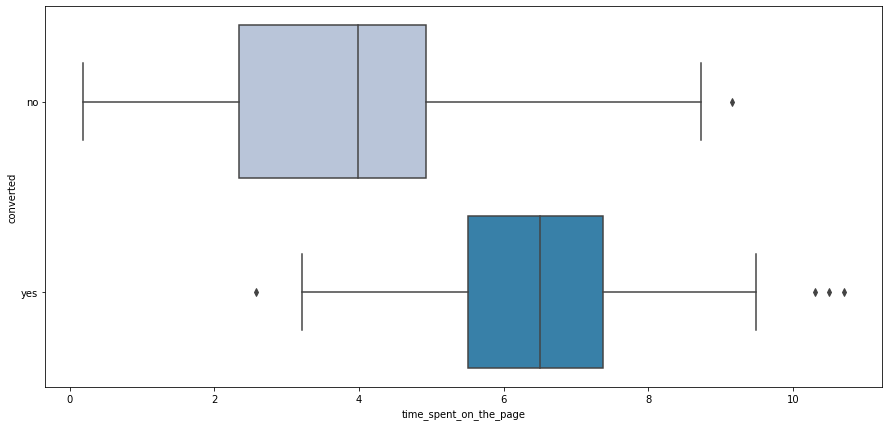

In [17]:
#Relationship between time_spent_on_the_page and converted
plt.figure(figsize=(15,7))
sns.boxplot(x = "time_spent_on_the_page", y = "converted", data = df, palette = 'PuBu')
plt.xticks(rotation = 0)
plt.show()

# Observations
*  The Interquartile Range of the no conversion boxplot is larger than the Interquartile Range of the yes conversion boxplot.
*  The no conversion boxplot looks to have a left skew.
*  The yes conversion boxplot looks to have a slight left skew.
*  The Interquartile range values of the yes boxplot are all higher than the 75th percentile value in the no conversion boxplot.
*  There is an outlier above the maximum value of the no boxplot.
*  There is an outlier below the minium value of the yes boxplot, and there are three outliers above the maximum value.
*  The median of the yes boxplot is 2+ minutes more than the no boxplot.

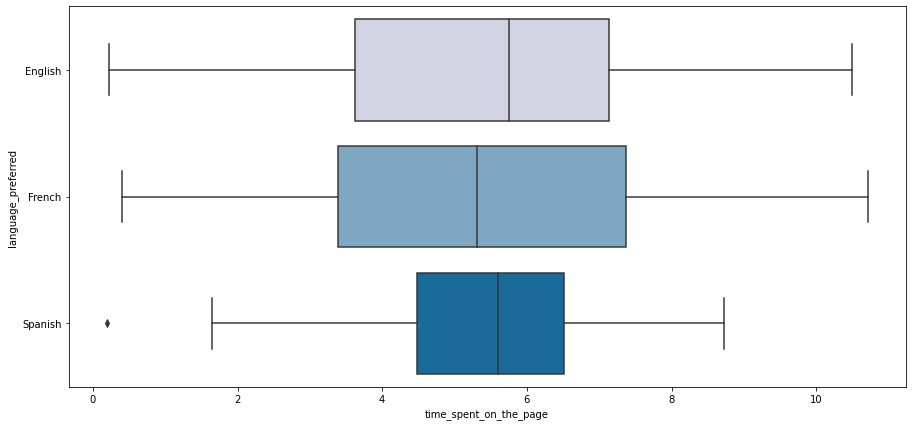

In [18]:
#Relationship between time_spent_on_the_page and language_preferred
plt.figure(figsize=(15,7))
sns.boxplot(x = "time_spent_on_the_page", y = "language_preferred", data = df, palette = 'PuBu')
plt.xticks(rotation = 0)
plt.show()

# Observations
*  The Interquartile Range is the largest for the French boxplot followed by the English and Spanish boxplots. 
*  The English and Spanish boxplots appear to have left skews, while the French boxplot appears to have a slight right skew.
*  The English and French boxplots have no outliers. 
*  The Spanish boxplot has one outlier below the minimum value.
*  The English boxplot has the highest median, followed closely by the Spanish, and last is the French.
*  The French boxplot has the lowest 25th percentile value of the three boxplots and the highest 75th percentile value of the three boxplots.

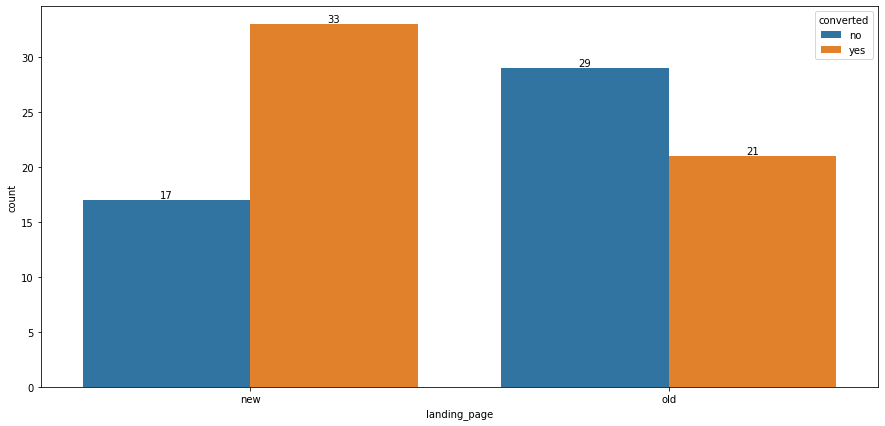

In [19]:
#Relationship between landing_page and converted
plt.figure(figsize=(15,7))
ax = sns.countplot(data = df, x = "landing_page", hue = "converted")
for container in ax.containers:
    ax.bar_label(container)

# Observations
*  Looking at the A/B test data, 12 more people converted on the new landing page than the old landing page.
*  12 more people didn't convert on the old landing page compared to the new landing page.
*  Both old and new landing page groups contain 50 people each.
*  The new landing page has the greatest differential between yes/no conversions (favoring yes) compared to the old landing page (+16 for new vs. +8 for old).

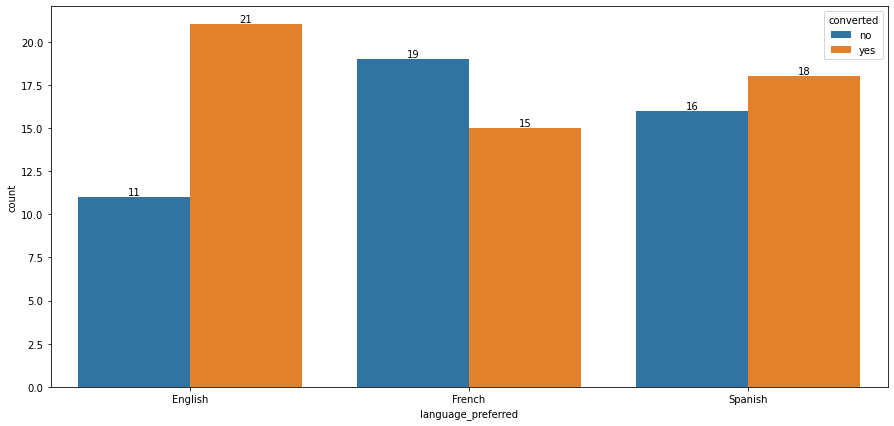

In [20]:
#Relationship between language_preferred and converted
plt.figure(figsize=(15,7))
ax = sns.countplot(data = df, x = "language_preferred", hue = "converted")
for container in ax.containers:
    ax.bar_label(container)

# Observations
*  The users that saw either the old or new landing in English had the most conversions, with 21. Next was Spanish users with 18, and last was French users with 15.
*  The French landing page had the most no conversions, followed by the Spanish one.
*  The English landing page had the fewest no conversions, and the greatest differential beteween yes/no conversions (favoring yes) of the three landing page languages (+10 for English, +4 for Spanish, and -2 for French).

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='landing_page'>

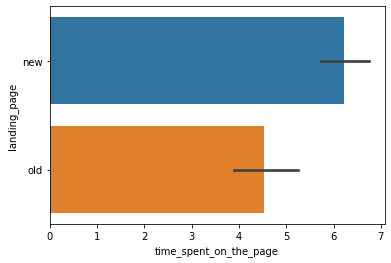

In [21]:
#Barplot of time_spent_on_the_page vs. landing_page type
sns.barplot(data = df, x = "time_spent_on_the_page", y = "landing_page")

<AxesSubplot:xlabel='time_spent_on_the_page', ylabel='landing_page'>

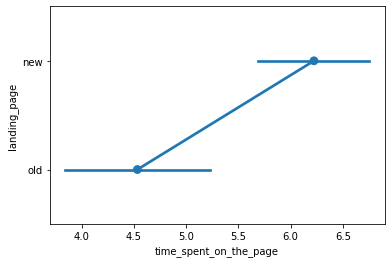

In [22]:
#Pointplot of time_spent_on_the_page vs. landing_page type
sns.pointplot(data = df, x = "time_spent_on_the_page", y = "landing_page")

### Observations
The barplot has a 95% confidence interval showing the 95% confidence interval as a black error bar on each bar. On the point plot, the point estimate for both old and new landing pages is shown as a dot, and the horiztonal lines that go through both point estimates (~4.5 minutes for the old landing page, and ~6.2 minutes for the new landing page) represent a 95% confidence interval. Per both plots, the lower and upper bounds of the 95% confidence interval for the new landing page is greater than the 95% confidence interval upper bound of the old landing page. There is no overlap between the two confidence intervals.

With 95% confidence, we can say that more time is spent on the new landing page than the old. Futher statistical analysis needs to be done to validate this.

### Step 1: Define the null and alternate hypotheses

We want to know if users are spending more time on the new landing page than the old landing page.

Null Hypothesis

$H_{0}$: $\mu_1 = \mu_2$, The time spent on the new landing page is equal to the time spent on the old landing page.

Alternative Hypothesis

$H_{a}$:  $\mu_1 > \mu_2$, The time spent on the new landing page is greater than the time spent on the old landing page.

### Step 2: Select Appropriate test

The two samples are from two independent populations, both samples were randomly selected, and the time spent on the landing page for both samples are continuous values. Both sample sizes are 50, which is greater than 30 and assumed to be normally distributed. The variances are assumed to be unequal.

A two independent sample t-test can be used to analyse the hypotheses and draw a conclusion.

### Step 3: Decide the significance level

Significance level is $\alpha$ = 0.05

### Step 4: Collect and prepare data

In [23]:
#Subsetting the data into two dataframes, one with time spent on the new landing page, and one with time spent on the old landing page

#new landing page (Treatment)
time_new = df["time_spent_on_the_page"].where(df["landing_page"] == "new")

#Dropping NaN values from time_new
time_new = time_new.dropna()

#Checking number of values in new landing page (treatment)
if time_new.shape[0] == 50:
    print("The number of values in the series is 50")
else:
    print("The number of values in the series is", time_new.shape[0])

The number of values in the series is 50


In [24]:
#new old page (control)
time_old = df["time_spent_on_the_page"].where(df["landing_page"] == "old")

#Dropping NaN values from time_old
time_old = time_old.dropna()

#Checking number of values in old landing page (control)
if time_old.shape[0] == 50:
    print("The number of values in the series is 50")
else:
    print("The number of values in the series is", time_old.shape[0])

The number of values in the series is 50


In [25]:
#Getting summary statistics of time spent on page
#New landing page (treatment)
time_new.describe()

count    50.000000
mean      6.223200
std       1.817031
min       1.650000
25%       5.175000
50%       6.105000
75%       7.160000
max      10.710000
Name: time_spent_on_the_page, dtype: float64

In [26]:
#Old landing page (control)
time_old.describe()

count    50.000000
mean      4.532400
std       2.581975
min       0.190000
25%       2.720000
50%       4.380000
75%       6.442500
max      10.300000
Name: time_spent_on_the_page, dtype: float64

### Step 5: Calculate the p-value

In [27]:
test_test, p_value = ttest_ind(time_new, time_old, equal_var = False, alternative = "greater")
print("The p-value is", round (p_value, 5))

The p-value is 0.00014


### Step 6: Compare the p-value with $\alpha$

In [28]:
#How does p_value compare to alpha?

alpha = 0.05

if p_value < alpha:
    print("The p-value is less than alpha, so the null hypothesis IS rejected.")
else:
    print("The p-value is greater than alpha, so the null hypothesis IS NOT rejected")

The p-value is less than alpha, so the null hypothesis IS rejected.


### Step 7:  Draw inference

Since the p-value is below the significance level, we reject the null hypothesis. The result is statistically significant, and we have enough statistical evidence to say that the time spent on the new landing page is greater than the time spent on the old landing page. This is also supported by the bar plot and the point plot.

Conclusion - The time spent on the new landing page is greater than the time spent on the old landing page.

**A similar approach can be followed to answer the other questions.**

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

### Perform Visual Analysis

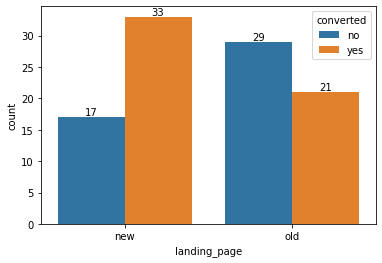

In [29]:
ax = sns.countplot(data = df, x = "landing_page", hue = "converted")
for container in ax.containers:
    ax.bar_label(container)

### Observations

*  Looking at the A/B test data, 12 more people converted on the new landing page than the old landing page.
*  12 more people didn't convert on the old landing page compared to the new landing page.
*  Both old and new landing page groups contain 50 people each.
*  The new landing page has the greatest differential between yes/no conversions (favoring yes) compared to the old landing page (+16 for new vs. +8 for old).

### Step 1: Define the null and alternate hypotheses

There are two categorical variables, "landing page" and "converted". We want to know if there is a significant difference in conversion rate proportion between the old landing page and the new landing page.

Null Hypothesis

$H_{0}$: $p_{1}$ = $p_{2}$, The conversion rate proportion for the new landing page is equal to conversion rate porportion for the old landing page.

Alternative Hypothesis

$H_{a}$: $p_{1}$ > $p_{2}$, The conversion rate proportion for the new landing page is greater than the conversion rate proportion for the old landing page.

### Step 2: Select Appropriate test

The two samples are from two independent populations, both samples were randomly selected, and the outcome (number of conversions) for both samples are discreet values. The formulated hypotheses are concerned with proportions (how many visitors became subscribers and how many didn't). A two proportion z-test can be used to analyse the hypotheses and draw a conclusion.

### Step 3: Decide the significance level

Significance level is $\alpha$ = 0.05

### Step 4: Collect and prepare data

In [30]:
#Subsetting the data into two dataframes, one for treatment (new landing page), and one for control (old landing page)

#treatment dataframe
treatment = df.loc[df["group"] == "treatment"]
treatment

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French
12,546491,treatment,new,5.86,yes,Spanish
13,546478,treatment,new,6.03,yes,French
15,546466,treatment,new,6.27,yes,Spanish
16,546443,treatment,new,8.73,no,English
22,546450,treatment,new,3.65,no,English


In [31]:
#control dataframe
control = df.loc[df["group"] == "control"]
control

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
3,546567,control,old,3.02,no,French
5,546558,control,old,5.28,yes,English
7,546581,control,old,6.53,yes,Spanish
9,546548,control,old,2.08,no,English
10,546588,control,old,6.21,yes,Spanish
11,546546,control,old,2.58,yes,English
14,546578,control,old,8.72,yes,Spanish
17,546555,control,old,0.40,no,English
18,546493,control,old,10.30,yes,English


In [32]:
#Confirming that the treatment group has 50 participants
if treatment.shape[0] == 50:
    print("The number of participants in the treatment group is 50")
else:
    print("The number of participants in the control group is" + str(treatment.shape[0]) + ", which is not 50")

#Confirming that the control group has 50 participants
if control.shape[0] == 50:
    print("The number of participants in the control group is 50")
else:
    print("The number of participants in the control group is" + str(control.shape[0]) + ", which is not 50")

The number of participants in the treatment group is 50
The number of participants in the control group is 50


In [33]:
#Filtering by converted for each dataframe
#treatment
treatment_yes = treatment.loc[treatment["converted"] == "yes"]

num_treatment_yes = treatment_yes.shape[0]
print("The number of people that converted on the new landing page is:", num_treatment_yes)

#control
control_yes = control.loc[control["converted"] == "yes"]

num_control_yes = control_yes.shape[0]
print("The number of people that converted on the old landing page is:", num_control_yes)

#Calculating proportion of conversions for both control and treatment groups
print(f"The proportions of yes conversions in the treatment and control groups are {round(num_treatment_yes/treatment.shape[0], 2)}, {round(num_control_yes/control.shape[0], 2)} respectively")

The number of people that converted on the new landing page is: 33
The number of people that converted on the old landing page is: 21
The proportions of yes conversions in the treatment and control groups are 0.66, 0.42 respectively


### Step 5: Calculate the p-value

In [34]:
#Calculating p-value using two sample proportion z-test
stat, p_value = proportions_ztest([num_treatment_yes, num_control_yes] , [treatment.shape[0],control.shape[0]], alternative = 'larger')
print("The p-value is", round(p_value, 5))

The p-value is 0.00803


### Step 6: Compare the p-value with $\alpha$

In [35]:
#How does p_value compare to alpha?

alpha = 0.05

if p_value < alpha:
    print("The p-value is less than alpha, so the null hypothesis IS rejected.")
else:
    print("The p-value is greater than alpha, so the null hypothesis IS NOT rejected")

The p-value is less than alpha, so the null hypothesis IS rejected.


### Step 7:  Draw inference

Since the p-value is below the significance level, we reject the null hypothesis. The result is statistically significant, and we have enough statistical evidence to say that the conversion rate proportion for the new landing page is greater than the conversion rate proportion for the old landing page. The count plot also shows that the new landing page performs better than the old landing page.

Conclusion - The conversion rate proportion for the new landing page is greater than conversion rate proportion for the old landing page.

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

### Perform Visual Analysis

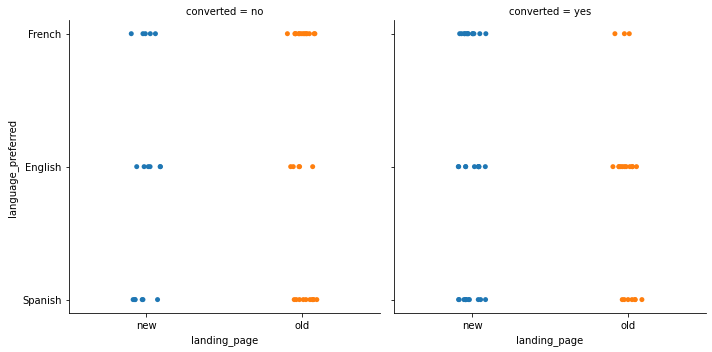

In [36]:
sns.catplot(x = "landing_page", y = "language_preferred", col = "converted", data = df)

### Observations
The catplot shows the number of people that did and did not convert on the old and new landing pages for each language (English, French, and Spanish). What's interesting is it appears that the English version of both landing pages has the most yes conversions, and the fewest no conversions, followed by the Spanish, and French landing pages (both old and new).

### Step 1: Define the null and alternate hypotheses

We want to know if converted status depends on the language the landing page was in.

Null Hypothesis

$H_{0}$: Conversion status is independent of the language the landing page is in.

Alternative Hypothesis

$H_{a}$: Conversion status is NOT independent of the language the landing page is in.

### Step 2: Select Appropriate test

The formulated hypotheses can be tested using a Chi-square test of independence of attributes, concerning the two categorical variables, landing page (old/new) and language the landing page was displayed in (English/French/Spanish).

### Step 3: Decide the significance level

Significance level is $\alpha$ = 0.05

### Step 4: Collect and prepare data

In [37]:
#Making a contingency table using crosstabs()
cont_table = pd.crosstab(df.converted, df.language_preferred)
cont_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [38]:
# use chi2_contingency() to find the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(cont_table)

# print the p-value
print("The p-value is", round(p_value, 5))

The p-value is 0.21299


### Step 6: Compare the p-value with $\alpha$

In [39]:
#How does p_value compare to alpha?

alpha = 0.05

if p_value < alpha:
    print("The p-value is less than alpha, so the null hypothesis IS rejected.")
else:
    print("The p-value is greater than alpha, so the null hypothesis IS NOT rejected")

The p-value is greater than alpha, so the null hypothesis IS NOT rejected


### Step 7:  Draw inference

Since the p-value is above the significance level, we don't reject the null hypothesis. The result is not statistically significant, and we don't have enough statistical evidence to say the conversion rate is NOT independent for the language the landing page is displayed in. This suggests that right now, conversion status and language the page is displayed in are independent of each other.

Conclusion - Conversion status is independent of the language the landing page is displayed in.

## 5. Is the mean time spent on the new page same for the different language users? (10 Marks)

### Perform Visual Analysis

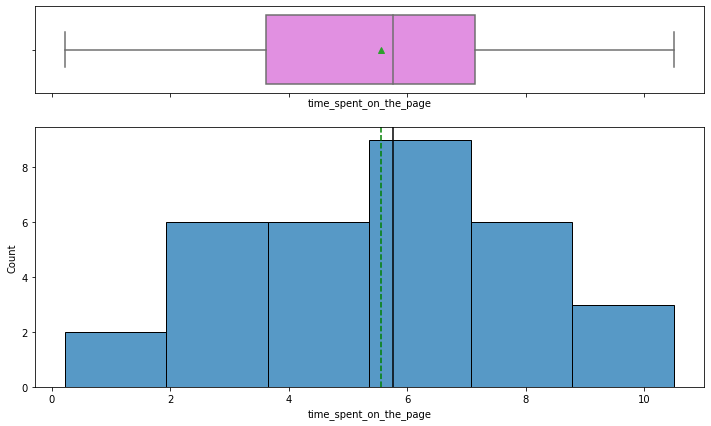

In [40]:
#English - Green triangle and dashed vertical line on boxplot and histogram represents mean
histogram_boxplot(df.loc[df["language_preferred"] == "English"], "time_spent_on_the_page")

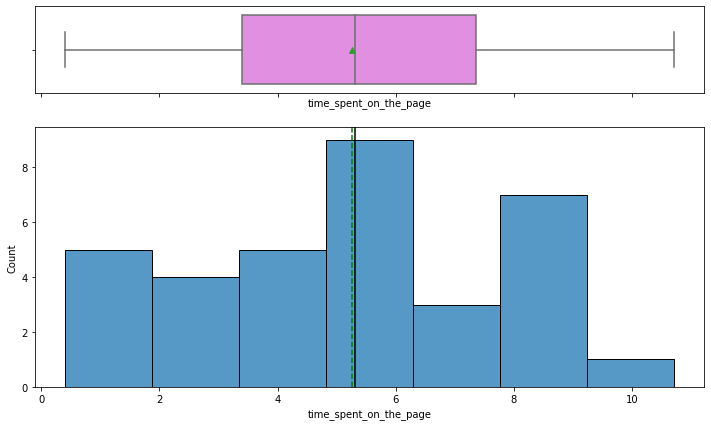

In [41]:
#French - Green triangle and dashed vertical line on boxplot and histogram represents mean
histogram_boxplot(df.loc[df["language_preferred"] == "French"], "time_spent_on_the_page")

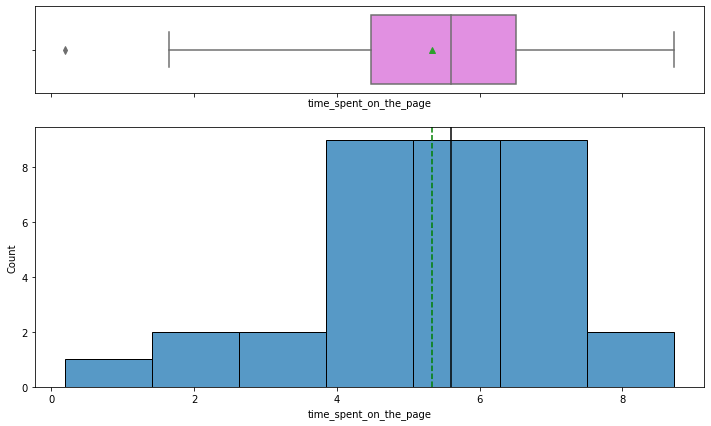

In [42]:
#Spanish - Green triangle and dashed vertical line on boxplot and histogram represents mean
histogram_boxplot(df.loc[df["language_preferred"] == "Spanish"], "time_spent_on_the_page")

### Observations
The boxplot and histograms for the different languages for the new landing page all have different means from the sample data. Statistical analysis needs to be done to determine if the means are similar.

### Step 1: Define the null and alternate hypotheses

We want to know if mean time spent on the new page is the same for English, French, and Spanish users.

Null Hypothesis

$H_{0}$: The mean times spent on the new landing page for English, French, and Spanish are equal.

Alternative Hypothesis

$H_{a}$: At least one of the mean times spent on the new landing page for English, French, and Spanish users is unequal.

### Step 2: Select Appropriate test

The formulated hypotheses can be tested using a a one way ANOVA F-test, concerning the average time spent on the new landing page and, language landing page was displayed in (English/French/Spanish). Populations are normally distributed and samples are random.

### Step 3: Decide the significance level

Significance level is $\alpha$ = 0.05

### Step 4: Collect and prepare data


In [43]:
#Getting the time spent values on the new landing page for each language

#English
English = df.loc[df["language_preferred"] == "English"]
English = English["time_spent_on_the_page"].where(English["landing_page"] == "new").dropna()
English

1      7.13
16     8.73
22     3.65
23     7.02
25     4.39
26     9.49
30     5.41
43     7.16
44     3.91
49    10.50
51     5.65
72     5.08
73     7.46
86     6.71
91     8.47
99     5.86
Name: time_spent_on_the_page, dtype: float64

In [44]:
#French
French = df.loc[df["language_preferred"] == "French"]
French = French["time_spent_on_the_page"].where(French["landing_page"] == "new").dropna()
French

6      5.25
8     10.71
13     6.03
28     7.81
46     5.37
57     8.30
60     6.01
61     6.79
65     7.27
71     5.42
78     9.12
80     4.68
81     5.26
87     3.68
88     3.30
90     5.40
93     4.94
Name: time_spent_on_the_page, dtype: float64

In [45]:
#Spanish
Spanish = df.loc[df["language_preferred"] == "Spanish"]
Spanish = Spanish["time_spent_on_the_page"].where(Spanish["landing_page"] == "new").dropna()
Spanish

2     4.40
4     4.75
12    5.86
15    6.27
24    6.18
38    1.65
42    7.16
47    7.23
48    8.08
52    6.47
54    6.41
68    6.70
77    3.88
82    5.74
95    5.15
97    7.07
98    6.20
Name: time_spent_on_the_page, dtype: float64

In [46]:
#Confirming that the English group has the same number of values per the contingency table
if English.shape[0] == 16:
    print("The number of people that viewed the new English landing page is", English.shape[0])
else:
    print("The number of people that viewed the new English landing page is" + str(English.shape[0]) + ", which is not 16")

#Confirming that the French group has the same number of values per the contingency table
if French.shape[0] == 17:
    print("The number of people that viewed the new French landing page is", French.shape[0])
else:
    print("The number of people that viewed the new French landing page is" + str(French.shape[0]) + ", which is not 17")
    
#Confirming that the Spanish group has the same number of values per the contingency table
if Spanish.shape[0] == 17:
    print("The number of people that viewed the new Spanish landing page is", Spanish.shape[0])
else:
    print("The number of people that viewed the new Spanish landing page is" + str(Spanish.shape[0]) + ", which is not 17")

The number of people that viewed the new English landing page is 16
The number of people that viewed the new French landing page is 17
The number of people that viewed the new Spanish landing page is 17


In [47]:
#Mean times spent on new landing page for the different languages
print(f"The mean time spent on the new landing page is {round(English.mean(), 2)} minutes for English users, {round(French.mean(), 2)} minutes for French users, and {round(Spanish.mean(), 2)} minutes for Spanish users")

The mean time spent on the new landing page is 6.66 minutes for English users, 6.2 minutes for French users, and 5.84 minutes for Spanish users


### Step 5: Calculate the p-value

In [48]:
test_statistic, p_value = f_oneway(English, French, Spanish)
print("tstat =", test_statistic, ", p-value =", p_value)

tstat = 0.8543992770006822 , p-value = 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [49]:
#How does p_value compare to alpha?

alpha = 0.05

if p_value < alpha:
    print("The p-value is less than alpha, so the null hypothesis IS rejected.")
else:
    print("The p-value is greater than alpha, so the null hypothesis IS NOT rejected")

The p-value is greater than alpha, so the null hypothesis IS NOT rejected


### Step 7:  Draw inference

Since the p-value is above the significance level, we don't reject the null hypothesis. The result is not statistically significant, and we don't have enough statistical evidence to say that at least one of the mean times spent on the new landing page for English, French, and Spanish users is unequal. This suggests that right now, despite the means of the samples being different, that the variances are within levels that are very nearly equal.

Conclusion - The mean times spent on the new landing page for English, French, and Spanish are equal.

## Conclusion and Business Recommendations

### Conclusions
*  It was confirmed that no one user was subjected to both landing pages.

*  After conducting a few statistical tests, the new landing page outperforms the old landing page. Users spent statistically significant more time on the new landing page, and it converts at a statiscally higher rate.

*  The new landing page has the greatest differential between yes/no conversions (favoring yes) compared to the old landing page (+16 for new vs. +8 for old).

*  For both landing types of landing page, the English landing pages the most yes conversions and highest differential between yes/no conversions (+10 yes/no). The Spanish landing pages barely had more yes conversions than no conversions (+4 yes/no). For the French landing pages, there were more no conversions than yes conversions (-2 yes/no).

*  Conversion was independent of lanuage the page was displayed in.

*  Despite there being some outliers on time spent, the mean times spent on the new landing pages are equal for the new English, French, and Spanish landing pages.

### Business Recommendations
*  Based on current results, consider re-running the statistical analyses to avoid the Law of Small Numbers fallacy (people underestimate the variability in small samples/small samples ought to resemble the population from which they are drawn/people overestimate what can be accomplished with a small study). Even though the number of people in both the control (old landing page) and treatment (new landing page group) groups were each 50 (meaning that n > 30 is needed for the Central Limit Theorem to kick in), all the subgroups (the languages preferred) were just over 30 each, and got further divided into smaller groups for yes/no conversions of both old and new landing pages. Rerunning these where all groups are n > 30 will confirm if variability was an issue with the intial set of samples.

*  If unable to do a statistical analysis with a larger sample, update the English landing page to the new one since holistically, new landing page outperforms the old landing page, and the English landing pages (old and new) have the highest positive conversion rate compared to Spanish and French.

*  For the Spanish and French landing pages, hold off on converting the landing pages to the new one. Collect heatmap data from the old and new landing pages to analyze differences in user behaviors for both landing pages to see what changes can be made to the landing page to boost subscriber count.